In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset 

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [8]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConcl', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class' ]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
# Converts strings g and f into 1s and 0s
df["class"] = (df["class"] == "g").astype(int)

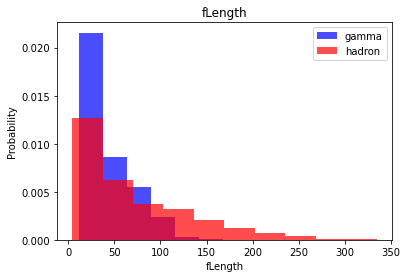

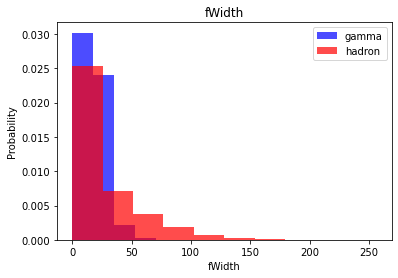

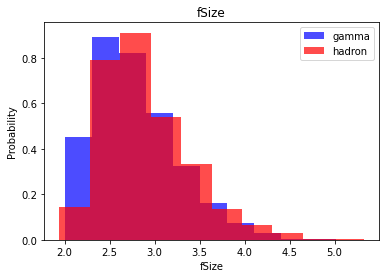

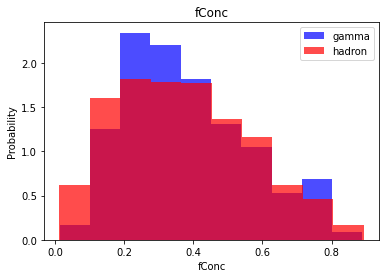

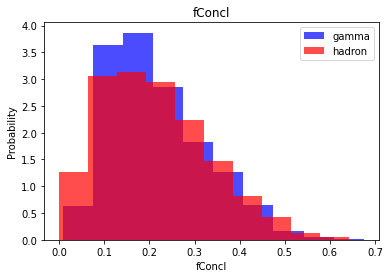

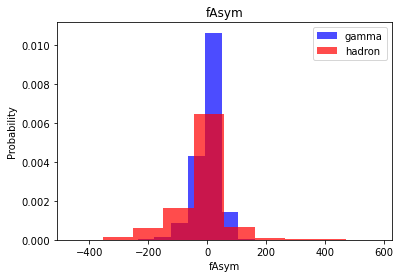

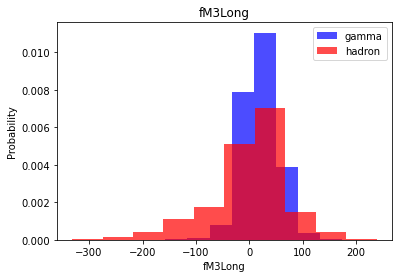

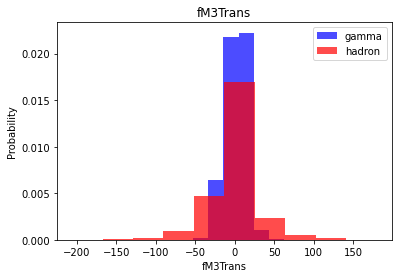

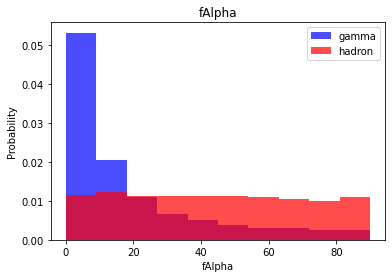

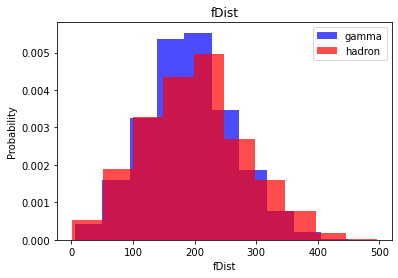

In [10]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color= 'blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color= 'red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

### Train, Validation, and Test Datasets

In [11]:
# Splits data into 60% train, 20% test, 20% validation
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [12]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [13]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

### kNN 
(Looks for the "nearest" labels using Euclidian distance and an arbitrary k value to classify new labels)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))
# Precision, out of how many was classified as positive, were truly positive
# Recall, out of those that are truly positive, how many were actually right

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1318
           1       0.86      0.86      0.86      2486

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



### Naive Bayes



In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

# A lot worse at classification than KNN for this dataset

              precision    recall  f1-score   support

           0       0.66      0.41      0.51      1318
           1       0.74      0.89      0.81      2486

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



### Logistic Regression
Put simply, trying to fit the data into a sigmoid function. 

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lgr_model = LogisticRegression()
lgr_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lgr_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Better than Naive Bayes, but still worse compared to KNN

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1318
           1       0.85      0.82      0.84      2486

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



### Support Vector Machines
Finding a hyperplane that best differeniates between gamma and hadron with the largest margins between the two. 
Cons: Susceptible to outliers

In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [25]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Highest accuracy so far, better than kNN, Naive Bayes, and Logisitic Regression

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1318
           1       0.89      0.89      0.89      2486

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Net

Breaks away from linear models and moves towards non-linear representations of data by introducing an activation function (sigmoid, tanh, relu, etc). Instead of each input being a linear combination of another, these activation functions adjust the input into the next neuron to prevent linearity.  

In [26]:
import tensorflow as tf

In [47]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()


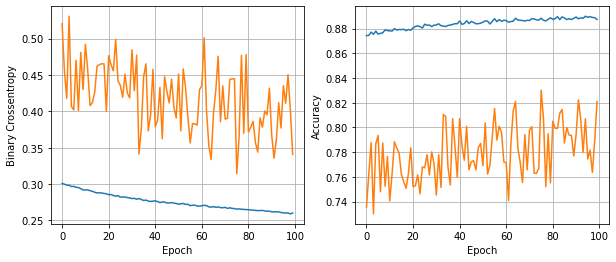

In [48]:
plot_history(history)

In [36]:

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs): 

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation ='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation ='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation ='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', 
                    metrics=['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
)

    return nn_model, history

16 nodes, dropout 0.2, lr 0.1, batch size 32


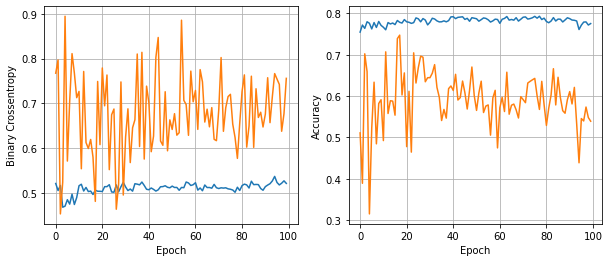

119/119 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.8336
16 nodes, dropout 0.2, lr 0.1, batch size 64


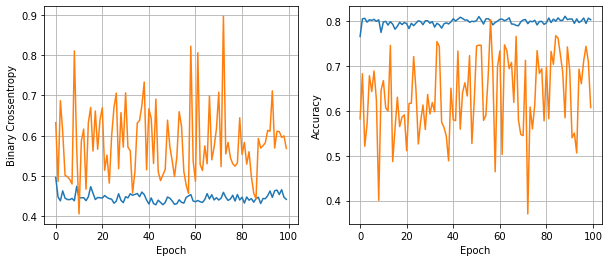

119/119 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8509
16 nodes, dropout 0.2, lr 0.1, batch size 128


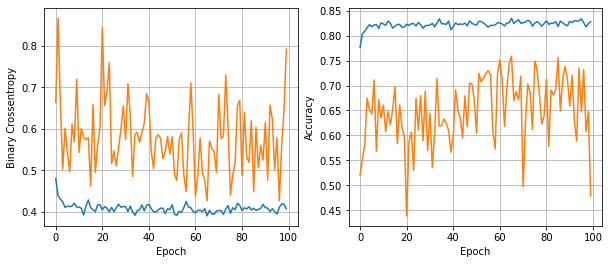

119/119 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8178
16 nodes, dropout 0.2, lr 0.005, batch size 32


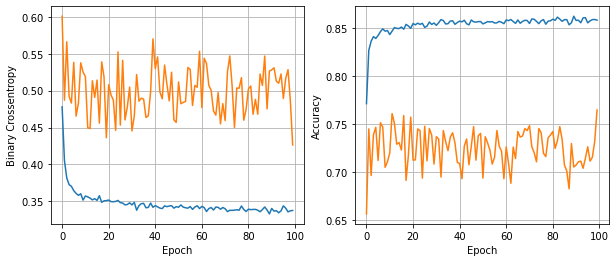

119/119 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.005, batch size 64


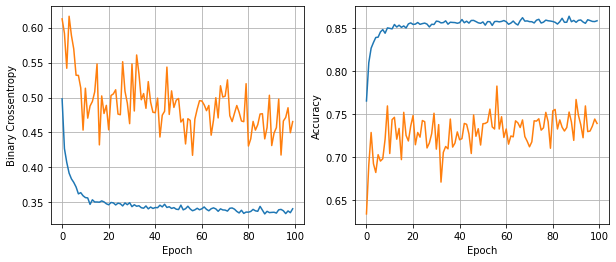

119/119 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.005, batch size 128


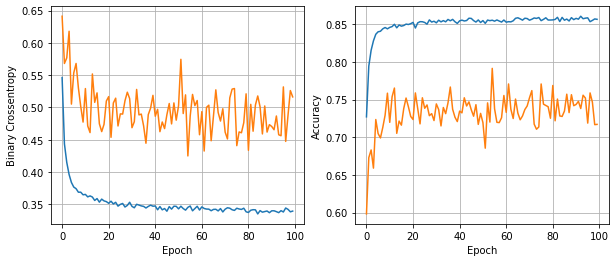

119/119 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.001, batch size 32


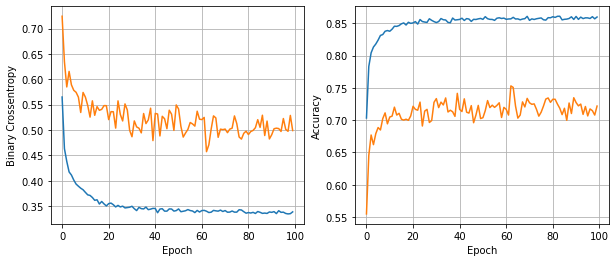

119/119 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.8741
16 nodes, dropout 0.2, lr 0.001, batch size 64


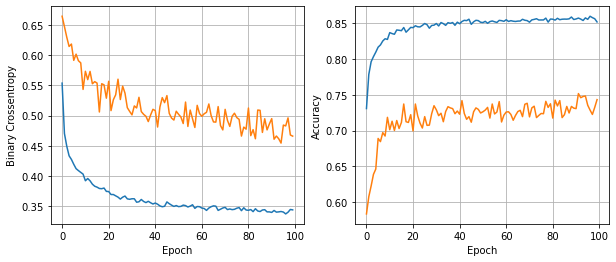

119/119 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8699
16 nodes, dropout 0.2, lr 0.001, batch size 128


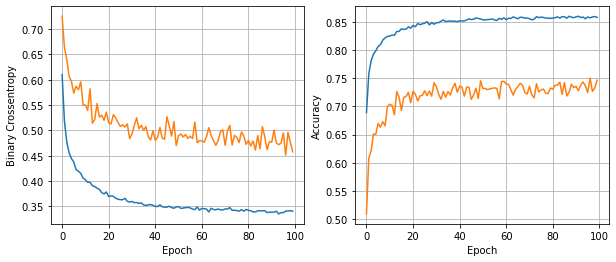

119/119 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.1, batch size 32


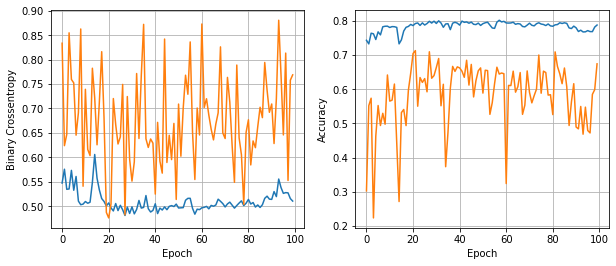

119/119 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8475
32 nodes, dropout 0.2, lr 0.1, batch size 64


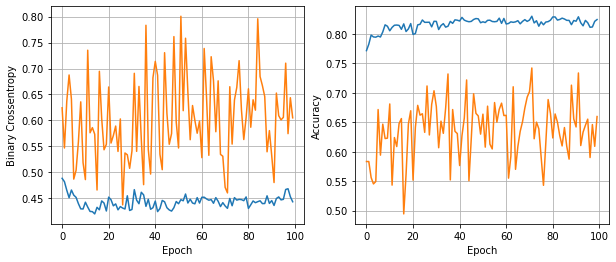

119/119 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8523
32 nodes, dropout 0.2, lr 0.1, batch size 128


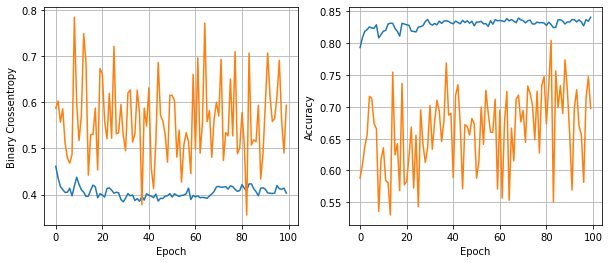

119/119 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8649
32 nodes, dropout 0.2, lr 0.005, batch size 32


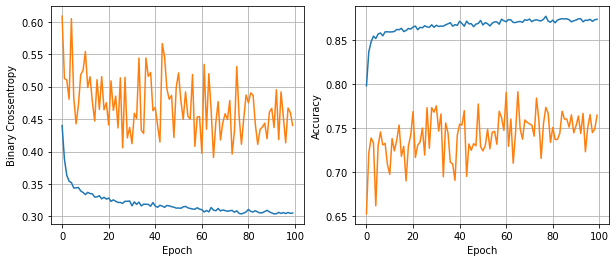

119/119 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8825
32 nodes, dropout 0.2, lr 0.005, batch size 64


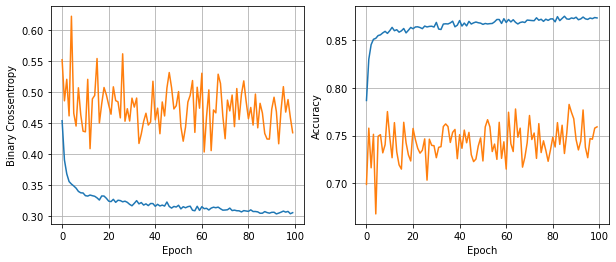

119/119 [==============================] - 0s 1ms/step - loss: 0.2966 - accuracy: 0.8775
32 nodes, dropout 0.2, lr 0.005, batch size 128


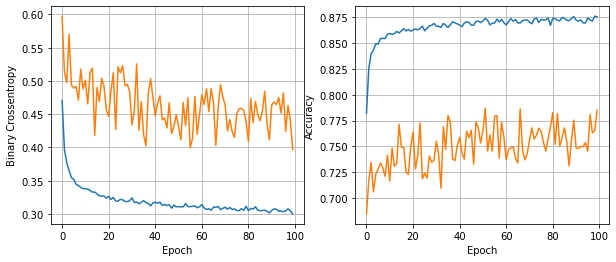

119/119 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.8807
32 nodes, dropout 0.2, lr 0.001, batch size 32


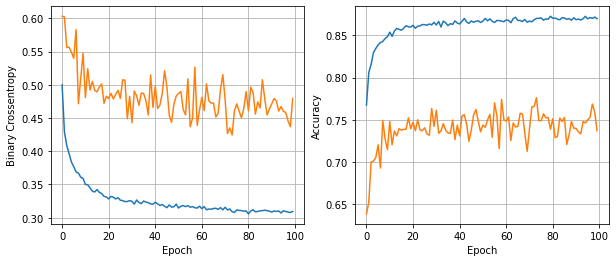

119/119 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8764
32 nodes, dropout 0.2, lr 0.001, batch size 64


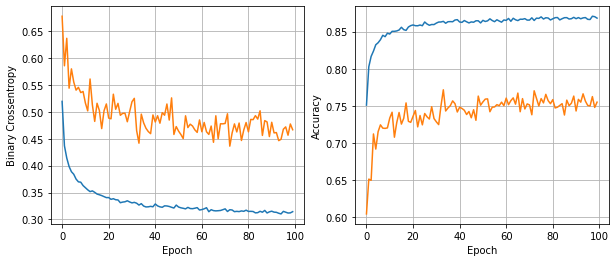

119/119 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.8725
32 nodes, dropout 0.2, lr 0.001, batch size 128


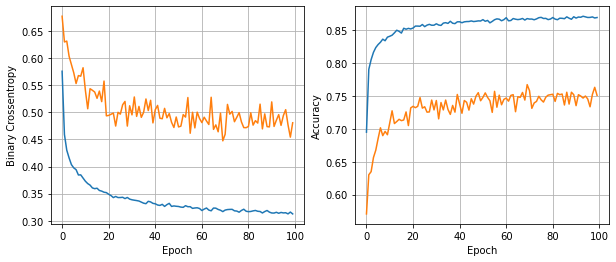

119/119 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8725
64 nodes, dropout 0.2, lr 0.1, batch size 32


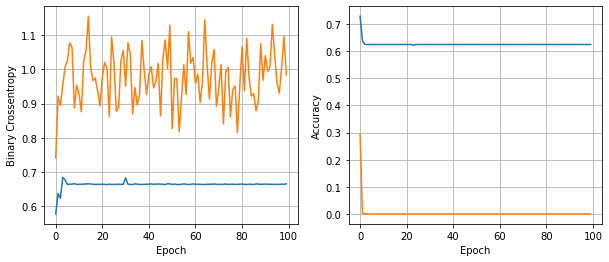

119/119 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6535
64 nodes, dropout 0.2, lr 0.1, batch size 64


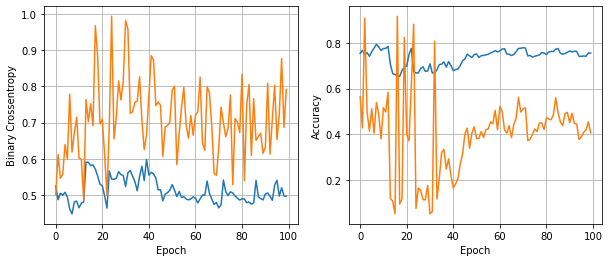

119/119 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.7992
64 nodes, dropout 0.2, lr 0.1, batch size 128


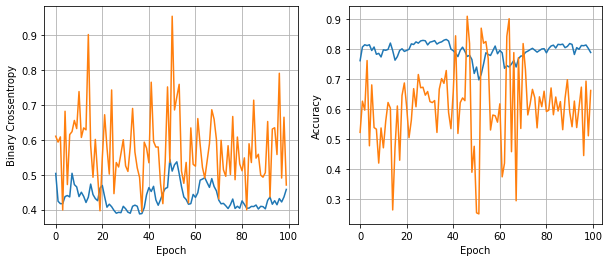

119/119 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8567
64 nodes, dropout 0.2, lr 0.005, batch size 32


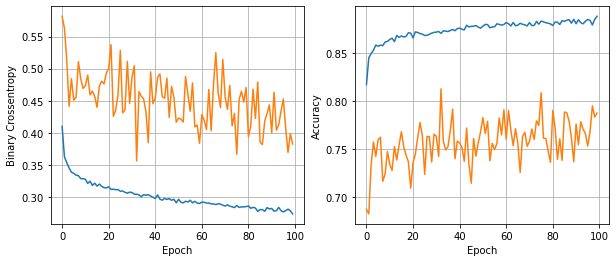

119/119 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.005, batch size 64


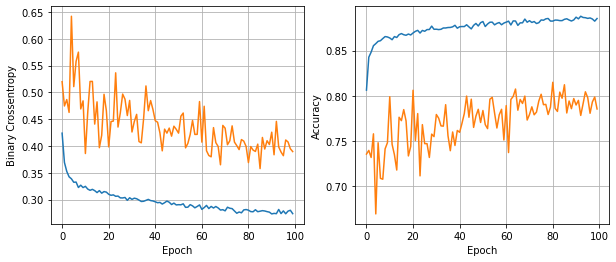

119/119 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.8791
64 nodes, dropout 0.2, lr 0.005, batch size 128


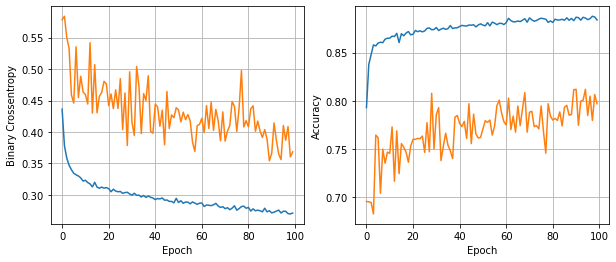

119/119 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.001, batch size 32


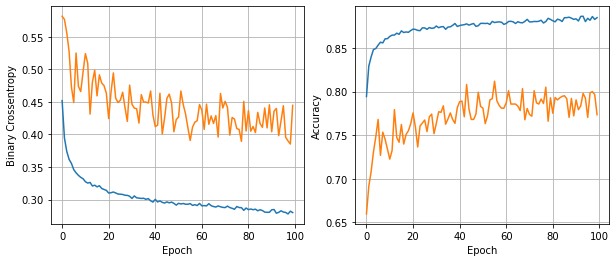

119/119 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.8804
64 nodes, dropout 0.2, lr 0.001, batch size 64


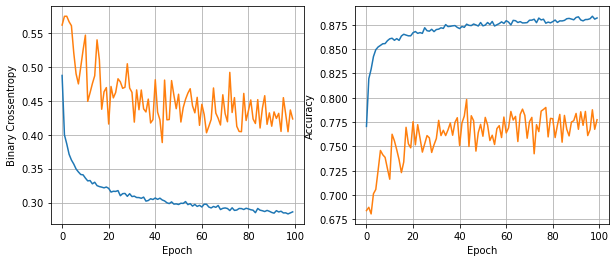

119/119 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.8809
64 nodes, dropout 0.2, lr 0.001, batch size 128


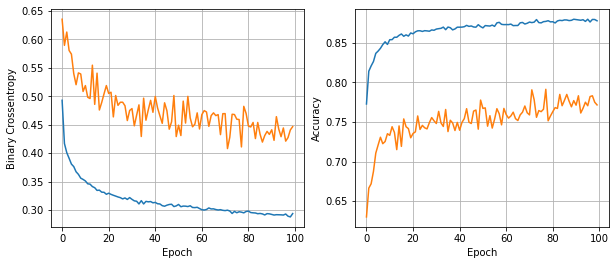

119/119 [==============================] - 0s 1ms/step - loss: 0.2892 - accuracy: 0.8783


In [54]:
epochs=100
for num_nodes in [16,32, 64]:
    for dropout_prob in [0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1318
           1       0.89      0.89      0.89      2486

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



<sup>